In [1]:
# Jupyter notebook 경고 메시지 숨기기
from warnings import filterwarnings
filterwarnings(action="ignore")

# 실습과제 8-2
(교재 연습문제 5-8)

## 문제
선형적으로 분리되는 데이터셋에 `LinearSVC`를 훈련시켜 보세요. 그런 다음 같은 데이터셋에 `SVC`와 `SGDClassfier`를 적용해보세요.
거의 비슷한 모델이 만들어지는지 확인해보세요.

## 풀이
붓꽃 데이터셋을 사용하였다.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

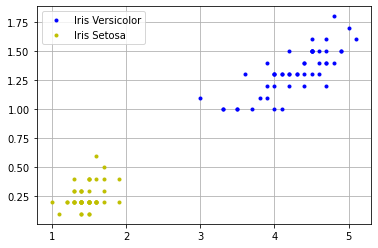

In [4]:
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "b.", label="Iris Versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "y.", label="Iris Setosa")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [5]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

lin_clf = LinearSVC(loss="hinge", C=5)
svm_clf = SVC(kernel="linear", C=5)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001,
                        alpha=1/(5*len(X)), max_iter=1000, tol=1e-3)


In [6]:
lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:       ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:             ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier:   ", sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:        [0.28474158] [[1.05364655 1.0990318 ]]
SVC:              [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier:    [0.12] [[0.77667516 0.7298981 ]]


그래프를 그리기 위해 각 결정 경계의 기울기와 편향을 구해준다.

In [7]:
# LinearSVC의 기울기와 편향
w_lin = -lin_clf.coef_[0, 0]    / lin_clf.coef_[0, 1]
b_lin = -lin_clf.intercept_[0]  / lin_clf.coef_[0, 1]

# SVC의 기울기와 편향
w_svm = -svm_clf.coef_[0, 0]    / svm_clf.coef_[0, 1]
b_svm = -svm_clf.intercept_[0]  / svm_clf.coef_[0, 1]

# SGDClassifier의 기울기와 편향
w_sgd = -sgd_clf.coef_[0, 0]    / sgd_clf.coef_[0, 1]
b_sgd = -sgd_clf.intercept_[0]  / sgd_clf.coef_[0, 1]

In [8]:
# 각 결정 경계를 원본 스케일로 변환
line_lin = scaler.inverse_transform([[-10, -10 * w_lin + b_lin], [10, 10 * w_lin + b_lin]])
line_svm = scaler.inverse_transform([[-10, -10 * w_svm + b_svm], [10, 10 * w_svm + b_svm]])
line_sgd = scaler.inverse_transform([[-10, -10 * w_sgd + b_sgd], [10, 10 * w_sgd + b_sgd]])

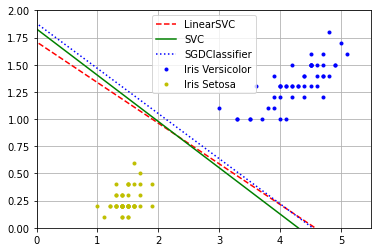

In [9]:
# 각 모델의 결정 경계를 표시
plt.plot(line_lin[:, 0], line_lin[:, 1], "r--", label="LinearSVC")
plt.plot(line_svm[:, 0], line_svm[:, 1], "g-", label="SVC")
plt.plot(line_sgd[:, 0], line_sgd[:, 1], "b:", label="SGDClassifier")

# 데이터를 표시
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "b.", label="Iris Versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "y.", label="Iris Setosa")

plt.legend(loc="upper center")
plt.grid(True)
plt.axis([0, 5.5, 0, 2])
plt.show()

# 실습과제 5-3
(교재 연습문제 5-9)

## 문제
MNIST 데이터셋에 SVM 분류기를 훈련시켜보세요. SVM 분류기는 이진 분류기라서 OvR 전략을 이용해 10개의 숫자를 분류해야 합니다.
처리 속도를 높이기 위해 작은 검증 세트로 하이퍼파라미터를 조정하는 것이 좋습니다. 어느 정도까지 정확도를 올릴 수 있나요?

## 풀이

In [10]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml("mnist_784", version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

In [11]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

MNIST에서 저 정도의 정확도가 나오면 문제가 있는 것이다. 우선 데이터의 스케일을 조정해 보자.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [19]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(random_state=42)

In [20]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9217333333333333

아직 부족하다.

In [21]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [22]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

6배나 적은 데이터에서 모델을 훈련시켰지만 더 좋은 성능을 얻었다. 이제 교차 검증을 사용한 랜덤 서치로 하이퍼파라미터 튜닝을 해 보자.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

rnd_search_cv = RandomizedSearchCV(svm_clf,
                                   {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)},
                                   n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=2.017139482834668, gamma=0.03833000089927637; total time=   0.1s
[CV] END .....C=2.017139482834668, gamma=0.03833000089927637; total time=   0.1s
[CV] END .....C=2.017139482834668, gamma=0.03833000089927637; total time=   0.1s
[CV] END ....C=10.402287517294818, gamma=0.09955076822007733; total time=   0.1s
[CV] END ....C=10.402287517294818, gamma=0.09955076822007733; total time=   0.1s
[CV] END ....C=10.402287517294818, gamma=0.09955076822007733; total time=   0.1s
[CV] END ....C=7.31156981129351, gamma=0.0071113070865325605; total time=   0.1s
[CV] END ....C=7.31156981129351, gamma=0.0071113070865325605; total time=   0.1s
[CV] END ....C=7.31156981129351, gamma=0.0071113070865325605; total time=   0.1s
[CV] END ...C=3.4783316666782538, gamma=0.003210879517523031; total time=   0.1s
[CV] END ...C=3.4783316666782538, gamma=0.003210879517523031; total time=   0.1s
[CV] END ...C=3.4783316666782538, gamma=0.003210

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C7474ADE20>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C747BB5700>},
                   verbose=2)

In [24]:
rnd_search_cv.best_estimator_

SVC(C=3.4783316666782538, gamma=0.003210879517523031)

In [25]:
rnd_search_cv.best_score_

0.8089766413119707

최선의 모델을 발견해냈다. 전체 데이터셋을 이용해 해당 모델을 다시 학습시켜보자.

In [26]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=3.4783316666782538, gamma=0.003210879517523031)

In [27]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9995666666666667

정말 높은 정확도가 나왔다. 이제 테스트 셋을 이용해 평가해 보자.

In [28]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9632

모델이 과대적합되었다. 훈련 세트를 더 많이 사용해 오래 랜덤 서치를 수행하면 더 나은 성능을 얻을 수 있었을 것이다.

# 실습과제 8-5
(교재 연습문제 5-10)

## 문제
캘리포니아 주택 가격 데이터셋에 SVM 회귀를 훈련시켜보세요.

## 풀이

In [29]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

X = housing["data"]
y = housing["target"]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR()
lin_svr.fit(X_train_scaled, y_train)

LinearSVR()

훈련 세트에 대한 성능 확인

In [33]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9564100322627416

In [34]:
np.sqrt(mse)

0.9779621834522751

세트에서 타깃은 만 달러 단위이기 이 모델의 오차는 약 1만 달러 정도 된다고 생각할 수 있다.
이제 RBF 커널을 사용해보자. 우선 하이퍼파라미터 `c`와 `gamma`의 적절한 값을 찾기 위해 랜덤 서치를 적용하자.

In [35]:
from sklearn.svm import SVR

rnd_search_cv = RandomizedSearchCV(SVR(),
                                   {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)},
                                   n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   7.2s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   7.1s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   7.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   7.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   6.8s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   6.9s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   6.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   6.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   6.7s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   6.5s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   6.5s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C749128670>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C749161760>},
                   random_state=42, verbose=2)

In [36]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785357

이전의 결과보다 훨씬 나은 것을 볼 수 있다. 이제 이를 테스트 세트에서 평가해 보자.

In [37]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528746